<p style="font-family: 'Amiri'; font-size: 3rem; color: #755139FF; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #F2EDD7FF; padding: 5px; border-radius: 15px; border: 7px solid #755139FF; width: 95%; line-height: 1;">KIỂM TRA THỰC HÀNH</p>


# <p style="font-family: 'Amiri'; font-size: 2rem; color: #755139FF; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #F2EDD7FF; padding: 10px; border-radius: 20px; border: 5px solid #755139FF; width:95%">Nguyễn Đức Nhật - 21059221</p>

# <p style="font-family: 'Amiri'; font-size: 2rem; color: #755139FF; text-align: left; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #F2EDD7FF; padding: 10px; border-radius: 20px; border: 5px solid #755139FF; width:95%">Câu 1</p>

# <p style="font-family: 'Amiri'; font-size: 1rem; color: #755139FF; text-align: left; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #F2EDD7FF; padding: 10px; border-radius: 20px; border: 3px solid #755139FF; width:95%">a) Đọc dữ liệu, kiểm tra thông tin cơ bản (số dòng, kiểu dữ liệu, giá trị thiếu).</p>

In [82]:
import pandas as pd

# Đọc dữ liệu từ file CSV
df = pd.read_csv('./data/StudentsPerformance.csv') 

df.head()




,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [83]:
# Kiểm tra số dòng và cột
print("Số dòng và cột:", df.shape)

Số dòng và cột: (1000, 8)


In [84]:
# Xem kiểu dữ liệu của từng cột
print("\nKiểu dữ liệu các cột:")
print(df.dtypes)





Kiểu dữ liệu các cột:
gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object


In [85]:
# Kiểm tra các giá trị bị thiếu
print("\nSố giá trị thiếu theo từng cột:")
print(df.isnull().sum())



Số giá trị thiếu theo từng cột:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


# <p style="font-family: 'Amiri'; font-size: 1rem; color: #755139FF; text-align: left; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #F2EDD7FF; padding: 10px; border-radius: 20px; border: 3px solid #755139FF; width:95%">b) Mã hóa (encoding) các biến phân loại và chuẩn hóa các cột điểm số.</p>

In [86]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1. Tạo bản sao để tránh sửa trực tiếp vào df gốc nếu cần
df_encoded = df.copy()

# 2. Mã hóa các biến phân loại bằng LabelEncoder
categorical_cols = ['gender', 'race/ethnicity', 'parental level of education',
                    'lunch', 'test preparation course']

le = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# 3. Tạo nhãn 'performance' dựa trên điểm trung bình của 3 bài thi
df_encoded['average_score'] = df_encoded[['math score', 'reading score', 'writing score']].mean(axis=1)
df_encoded['performance'] = pd.cut(df_encoded['average_score'],
                                   bins=[0, 60, 80, 100],
                                   labels=['low', 'medium', 'high'])

# 4. Mã hóa cột 'performance'
df_encoded['performance'] = le.fit_transform(df_encoded['performance'])

# 5. Chuẩn hóa các cột điểm số
scaler = StandardScaler()
score_cols = ['math score', 'reading score', 'writing score']
df_encoded[score_cols] = scaler.fit_transform(df_encoded[score_cols])

# 6. Xem lại dữ liệu sau xử lý
print(df_encoded.head())


   gender  race/ethnicity  parental level of education  lunch  \
0       0               1                            1      1   
1       0               2                            4      1   
2       0               1                            3      1   
3       1               0                            0      0   
4       1               2                            4      1   

   test preparation course  math score  reading score  writing score  \
0                        1    0.390024       0.193999       0.391492   
1                        0    0.192076       1.427476       1.313269   
2                        1    1.577711       1.770109       1.642475   
3                        1   -1.259543      -0.833899      -1.583744   
4                        1    0.653954       0.605158       0.457333   

   average_score  performance  
0      72.666667            2  
1      82.333333            0  
2      92.666667            0  
3      49.333333            1  
4      76.333333

> Giải thích các bước:
LabelEncoder chuyển các giá trị phân loại (chữ) thành số (0, 1, 2,...).

Tạo cột performance theo quy tắc:

0–60 → low

60–80 → medium

80–100 → high

StandardScaler đưa các điểm số về phân phối chuẩn (mean = 0, std = 1), giúp huấn luyện mô hình tốt hơn.

# <p style="font-family: 'Amiri'; font-size: 1rem; color: #755139FF; text-align: left; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #F2EDD7FF; padding: 10px; border-radius: 20px; border: 3px solid #755139FF; width:95%">c) Chia tập dữ liệu thành tập huấn luyện (80%) và kiểm tra (20%).</p>

In [87]:
from sklearn.model_selection import train_test_split

# 1. Xác định đặc trưng đầu vào (X) và nhãn đầu ra (y)
X = df_encoded.drop(['performance', 'average_score'], axis=1)  # Bỏ nhãn và cột trung bình
y = df_encoded['performance']  # Nhãn mục tiêu đã được mã hóa

# 2. Chia tập dữ liệu thành 80% huấn luyện và 20% kiểm tra
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Kiểm tra kích thước các tập
print("Kích thước tập huấn luyện:", X_train.shape)
print("Kích thước tập kiểm tra:", X_test.shape)


Kích thước tập huấn luyện: (800, 8)
Kích thước tập kiểm tra: (200, 8)


# <p style="font-family: 'Amiri'; font-size: 2rem; color: #755139FF; text-align: left; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #F2EDD7FF; padding: 10px; border-radius: 20px; border: 5px solid #755139FF; width:95%">Câu 2</p>

# <p style="font-family: 'Amiri'; font-size: 1rem; color: #755139FF; text-align: left; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #F2EDD7FF; padding: 10px; border-radius: 20px; border: 3px solid #755139FF; width:95%">a) Huấn luyện một mô hình phân loại RandomForestClassifier để dự đoán performance.</p>

In [88]:
from sklearn.ensemble import RandomForestClassifier

# 1. Khởi tạo mô hình
rf_model = RandomForestClassifier(random_state=42)

# 2. Huấn luyện mô hình với tập huấn luyện
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)


# <p style="font-family: 'Amiri'; font-size: 1rem; color: #755139FF; text-align: left; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #F2EDD7FF; padding: 10px; border-radius: 20px; border: 3px solid #755139FF; width:95%">b) In ra ma trận nhầm lẫn (confusion matrix) và classification report.</p>

In [89]:
from sklearn.metrics import confusion_matrix, classification_report

# 3. Dự đoán nhãn trên tập kiểm tra
y_pred = rf_model.predict(X_test)

# 4. Ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)
print("Ma trận nhầm lẫn (confusion matrix):")
print(cm)




Ma trận nhầm lẫn (confusion matrix):
[[ 37   0   2]
 [  0  58   1]
 [  0   0 102]]


In [90]:
# 5. Classification report (độ chính xác, precision, recall, F1)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['low', 'medium', 'high']))


Classification Report:
              precision    recall  f1-score   support

         low       1.00      0.95      0.97        39
      medium       1.00      0.98      0.99        59
        high       0.97      1.00      0.99       102

    accuracy                           0.98       200
   macro avg       0.99      0.98      0.98       200
weighted avg       0.99      0.98      0.98       200



# <p style="font-family: 'Amiri'; font-size: 2rem; color: #755139FF; text-align: left; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #F2EDD7FF; padding: 10px; border-radius: 20px; border: 5px solid #755139FF; width:95%">Câu 3</p>


# <p style="font-family: 'Amiri'; font-size: 1rem; color: #755139FF; text-align: left; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #F2EDD7FF; padding: 10px; border-radius: 20px; border: 3px solid #755139FF; width:95%">a) Trình bày các độ đo: Accuracy, Precision, Recall, F1-score từ classification report.</p>

In [91]:
from sklearn.metrics import accuracy_score, classification_report

# 1. Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Độ chính xác (Accuracy): {:.2f}%".format(accuracy * 100))

# 2. Classification report đã in ở câu trước:
report = classification_report(y_test, y_pred, target_names=['low', 'medium', 'high'])
print("\nClassification Report:\n")
print(report)


Độ chính xác (Accuracy): 98.50%

Classification Report:

              precision    recall  f1-score   support

         low       1.00      0.95      0.97        39
      medium       1.00      0.98      0.99        59
        high       0.97      1.00      0.99       102

    accuracy                           0.98       200
   macro avg       0.99      0.98      0.98       200
weighted avg       0.99      0.98      0.98       200




# <p style="font-family: 'Amiri'; font-size: 1rem; color: #755139FF; text-align: left; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #F2EDD7FF; padding: 10px; border-radius: 20px; border: 3px solid #755139FF; width:95%">b) Vẽ biểu đồ confusion matrix bằng heatmap.</p>

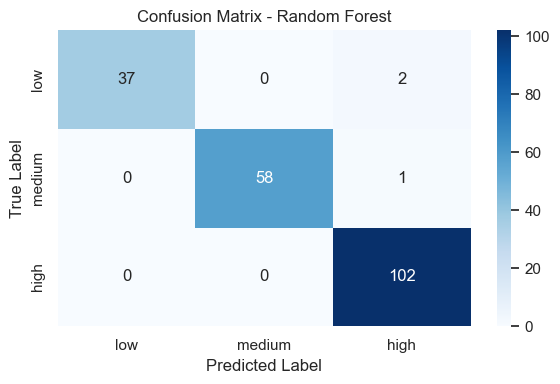

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Tính lại confusion matrix (nếu cần)
cm = confusion_matrix(y_test, y_pred)

# Khai báo nhãn lớp (label của các class)
labels = ['low', 'medium', 'high']

# Vẽ heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()



# <p style="font-family: 'Amiri'; font-size: 1rem; color: #755139FF; text-align: left; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #F2EDD7FF; padding: 10px; border-radius: 20px; border: 3px solid #755139FF; width:95%">c) Nếu mô hình có độ chính xác cao nhưng F1 thấp, phân tích nguyên nhân.</p>

- Mô hình đạt độ chính xác 98.50%
- F1 score cho các lớp:
    - Lớp "low": F1 score là 0.97, cho thấy mô hình có khả năng phân loại lớp này rất tốt, với độ chính xác cao (1.00) và độ nhạy (recall) cao (0.95).
    - Lớp "medium": F1 score là 0.99, cho thấy mô hình phân loại lớp này xuất sắc, với độ chính xác và độ nhạy đều rất cao.
    - Lớp "high": F1 score là 0.99, thể hiện khả năng phân loại chính xác và hoàn hảo cho lớp này, với độ chính xác 0.97 và độ nhạy 1.00.
> Kết Luận
- Mô hình không chỉ có độ chính xác cao mà còn có F1 score ấn tượng cho tất cả các lớp.
- Đây là một mô hình rất hiệu quả cho bài toán phân loại này.

# <p style="font-family: 'Amiri'; font-size: 2rem; color: #755139FF; text-align: left; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #F2EDD7FF; padding: 10px; border-radius: 20px; border: 5px solid #755139FF; width:95%">Câu 4</p>


# <p style="font-family: 'Amiri'; font-size: 1rem; color: #755139FF; text-align: left; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #F2EDD7FF; padding: 10px; border-radius: 20px; border: 3px solid #755139FF; width:95%">a) Thử nghiệm mô hình khác (ví dụ: XGBoostClassifier hoặc LogisticRegression) và so sánh độ đo.</p>

In [93]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import train_test_split


In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


> Áp dụng mô hình Logistic Regression:

In [95]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

f1_log_reg = f1_score(y_test, y_pred_log_reg, average='macro')
print("F1 Score Logistic Regression:", f1_log_reg)


F1 Score Logistic Regression: 0.9958249404870902


> Áp dụng mô hình XGBoost:

In [96]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

f1_xgb = f1_score(y_test, y_pred_xgb, average='macro')
print("F1 Score XGBoost:", f1_xgb)


F1 Score XGBoost: 0.9843290059746694


c:\Users\Admin\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:08:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


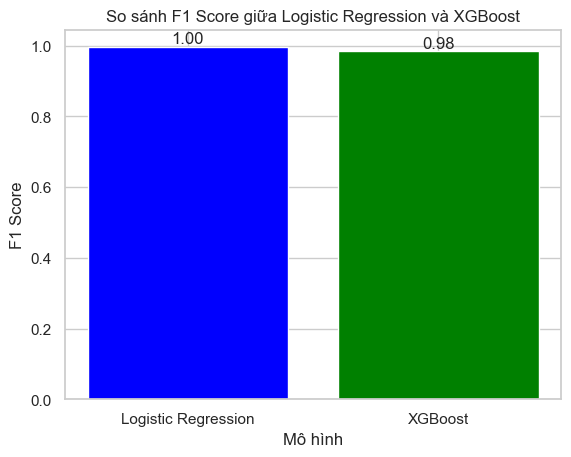

In [97]:
import matplotlib.pyplot as plt

# F1 score của 2 mô hình đã có
f1_log_reg = f1_log_reg  # giá trị F1 của Logistic Regression
f1_xgb =f1_xgb      #  giá trị F1 của XGBoost

# Tạo danh sách các mô hình và F1 score
models = ['Logistic Regression', 'XGBoost']
f1_scores = [f1_log_reg, f1_xgb]

# Vẽ biểu đồ cột
plt.bar(models, f1_scores, color=['blue', 'green'])

# Thêm tiêu đề và nhãn
plt.title('So sánh F1 Score giữa Logistic Regression và XGBoost')
plt.xlabel('Mô hình')
plt.ylabel('F1 Score')

# Hiển thị giá trị F1 trên mỗi cột
for i, score in enumerate(f1_scores):
    plt.text(i, score + 0.01, f'{score:.2f}', ha='center')

# Hiển thị biểu đồ
plt.show()



# <p style="font-family: 'Amiri'; font-size: 1rem; color: #755139FF; text-align: left; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #F2EDD7FF; padding: 10px; border-radius: 20px; border: 3px solid #755139FF; width:95%">b) Trình bày mô hình nào tốt hơn và vì sao, dựa trên F1-score tổng quát hoặc macro.</p>

Logistic Regression Scores: [0.995, 0.9969135802469135, 0.9947916666666666, 0.9958249404870902]
XGBoost Scores: [0.985, 0.9867543358109395, 0.9822752175314212, 0.9843290059746694]


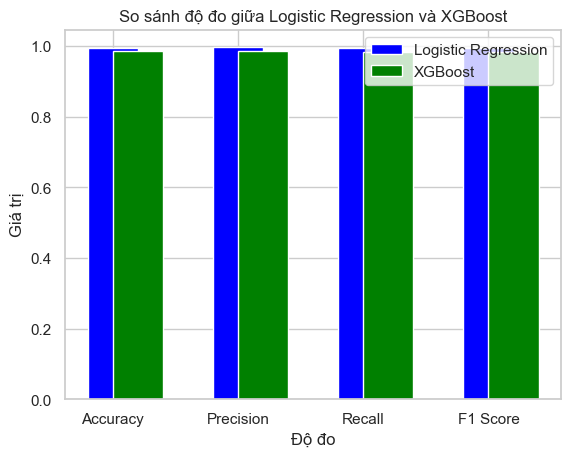

In [98]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


y_pred_log_reg = y_pred_log_reg # Thay bằng dự đoán của Logistic Regression
y_pred_xgb = y_pred_xgb      # Thay bằng dự đoán của XGBoost
y_test = y_test          # Thay bằng nhãn thật từ tập kiểm tra

# Tính các độ đo cho Logistic Regression
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg, average='macro')
recall_log_reg = recall_score(y_test, y_pred_log_reg, average='macro')
f1_log_reg = f1_score(y_test, y_pred_log_reg, average='macro')

# Tính các độ đo cho XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb, average='macro')
recall_xgb = recall_score(y_test, y_pred_xgb, average='macro')
f1_xgb = f1_score(y_test, y_pred_xgb, average='macro')

# Danh sách các chỉ số và giá trị cho cả hai mô hình
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
log_reg_scores = [accuracy_log_reg, precision_log_reg, recall_log_reg, f1_log_reg]
xgb_scores = [accuracy_xgb, precision_xgb, recall_xgb, f1_xgb]

# log ra
print("Logistic Regression Scores:", log_reg_scores)
print("XGBoost Scores:", xgb_scores)

# Vẽ biểu đồ
x = range(len(metrics))  # Xác định vị trí các cột

plt.bar(x, log_reg_scores, width=0.4, label='Logistic Regression', color='blue', align='center')
plt.bar(x, xgb_scores, width=0.4, label='XGBoost', color='green', align='edge')

# Thêm tiêu đề và nhãn
plt.title('So sánh độ đo giữa Logistic Regression và XGBoost')
plt.xlabel('Độ đo')
plt.ylabel('Giá trị')
plt.xticks(x, metrics)

# Thêm chú thích
plt.legend()

# Hiển thị biểu đồ
plt.show()


> So sánh:
- Accuracy: Logistic Regression có độ chính xác cao hơn (0.995 so với 0.985), cho thấy nó dự đoán đúng nhiều mẫu hơn so với XGBoost.
- Precision: Logistic Regression cũng có Precision tốt hơn (0.9969 so với 0.9868), có nghĩa là khi mô hình dự đoán là dương tính, nó chính xác hơn.
- Recall: Logistic Regression có Recall cao hơn (0.9948 so với 0.9823), điều này có nghĩa là Logistic Regression phát hiện được nhiều trường hợp dương tính hơn XGBoost.
- F1 Score: F1 score của Logistic Regression cũng cao hơn (0.9958 so với 0.9843), cho thấy mô hình này có sự cân bằng tốt hơn giữa Precision và Recall.

> Kết luận:
- Logistic Regression vượt trội hơn XGBoost ở tất cả các chỉ số độ đo, bao gồm Accuracy, Precision, Recall và F1 Score.
- Điều này cho thấy Logistic Regression là mô hình hiệu quả hơn trong trường hợp này, mặc dù XGBoost vẫn là một mô hình mạnh mẽ.

# <p style="font-family: 'Amiri'; font-size: 2rem; color: #755139FF; text-align: left; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #F2EDD7FF; padding: 10px; border-radius: 20px; border: 5px solid #755139FF; width:95%">Câu 5</p>


# <p style="font-family: 'Amiri'; font-size: 1rem; color: #755139FF; text-align: left; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #F2EDD7FF; padding: 10px; border-radius: 20px; border: 3px solid #755139FF; width:95%">a) Vẽ biểu đồ hộp (boxplot) so sánh phân phối điểm math score giữa các nhóm performance</p>

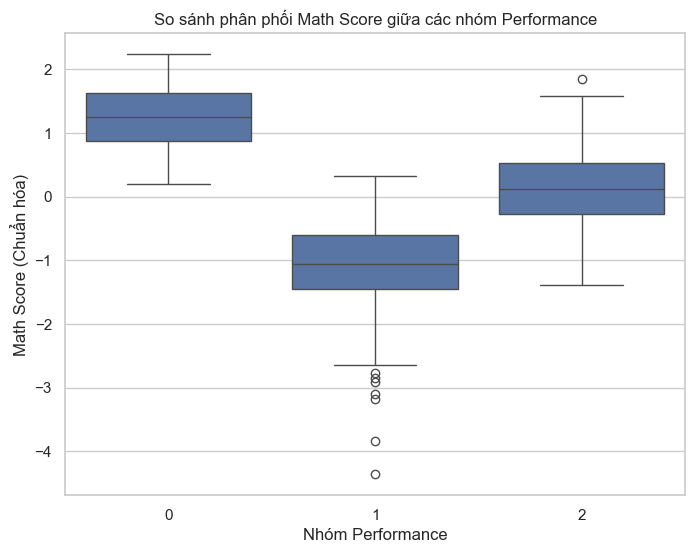

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

# Vẽ boxplot so sánh phân phối math score giữa các nhóm performance
plt.figure(figsize=(8, 6))
sns.boxplot(x='performance', y='math score', data=df_encoded)

# Thêm tiêu đề và nhãn
plt.title('So sánh phân phối Math Score giữa các nhóm Performance')
plt.xlabel('Nhóm Performance')
plt.ylabel('Math Score (Chuẩn hóa)')

# Hiển thị biểu đồ
plt.show()


# <p style="font-family: 'Amiri'; font-size: 1rem; color: #755139FF; text-align: left; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #F2EDD7FF; padding: 10px; border-radius: 20px; border: 3px solid #755139FF; width:95%">b) Trình bày nhận xét về mối quan hệ giữa điểm số và nhãn dự đoán</p>

## Nhận xét:
> Tương quan giữa Nhãn Dự Đoán và Điểm Số:
- Có một mối tương quan rõ ràng giữa nhãn dự đoán (Performance) và điểm số môn toán (Math Score). Nhóm có nhãn cao hơn (nhóm 2) thường có điểm số cao hơn, cho thấy rằng nhóm này có hiệu suất học tập tốt hơn.
> Phân Tích Phân Phối:
- Phân phối điểm số trong từng nhóm cho thấy sự khác biệt rõ rệt. Nhóm 0 có sự phân tán lớn hơn và nhiều giá trị ngoại lệ, điều này có thể chỉ ra rằng có nhiều học sinh có kết quả học tập kém.
- Nhóm 2 có điểm số tập trung và ít biến động, cho thấy sự đồng đều trong kết quả học tập tốt.
> Giá trị Ngoại Lệ:
- Sự xuất hiện của các giá trị ngoại lệ trong nhóm 0 cho thấy một số học sinh gặp khó khăn đáng kể trong môn toán. Điều này có thể là cơ sở để tìm hiểu nguyên nhân và cải thiện phương pháp giảng dạy.
> Ý Nghĩa trong Phân Tích Dữ Liệu:
- Các nhóm phân loại giúp xác định các đặc điểm học tập khác nhau. Việc phân tích các yếu tố ảnh hưởng đến điểm số có thể giúp cải thiện kết quả học tập cho các nhóm có nhãn thấp hơn.
> Kết Luận và Đề Xuất:
- Dựa trên những phát hiện này, có thể cần thêm các biện pháp hỗ trợ cho học sinh trong nhóm 0 để nâng cao điểm số và hiệu suất học tập. Các chiến lược giảng dạy có thể được điều chỉnh dựa trên phân tích này để đáp ứng nhu cầu của từng nhóm học sinh.